<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#there-are-3-types-of-data:-test-data,-train-data,-validation-data" data-toc-modified-id="there-are-3-types-of-data:-test-data,-train-data,-validation-data-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>there are 3 types of data: test data, train data, validation data</a></span></li><li><span><a href="#Linear-regression-model:-B-=-W-*-r-+-c" data-toc-modified-id="Linear-regression-model:-B-=-W-*-r-+-c-0.0.2"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>Linear regression model: B = W * r + c</a></span></li><li><span><a href="#evaluate-model-with-test-data" data-toc-modified-id="evaluate-model-with-test-data-0.0.3"><span class="toc-item-num">0.0.3&nbsp;&nbsp;</span>evaluate model with test data</a></span></li><li><span><a href="#build-neural-belief-data-using-the-learned-model" data-toc-modified-id="build-neural-belief-data-using-the-learned-model-0.0.4"><span class="toc-item-num">0.0.4&nbsp;&nbsp;</span>build neural belief data using the learned model</a></span></li></ul></li></ul></li><li><span><a href="#" data-toc-modified-id="-1"><span class="toc-item-num">1&nbsp;&nbsp;</span></a></span></li></ul></div>

In [1]:
"""
written by Minhae Kwon, modified by Zhengwei Wu 
Linear regression for "Encoding" Process
This code works very well!

ref: https://chrisalbon.com/machine_learning/linear_regression/linear_regression_using_scikit-learn/
     https://datatofish.com/multiple-linear-regression-python/

cross validate score: Coefficient of determination
https://en.wikipedia.org/wiki/Coefficient_of_determination
"""

from pandas import DataFrame, read_csv
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
#from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# hyperparameters
TEST_SIZE = 0.2  # ratio of test data set 
N_SPLITS = 10 # "K" in K-fold cross validation 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# pdf.fontype and ps.fontype must be set to 42 in order for text in exported figure to be editable in Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "CMU Serif"



In [3]:
# read data
bb_df = read_csv('./data/bb_df.csv') #behavior belief =[belief for box1, beleif for box2]
r_df = read_csv('./data/r_df.csv') # 100 neuron response

### there are 3 types of data: test data, train data, validation data

In [4]:
# separate test data set
r_df_train, r_df_test, bb_df_train, bb_df_test = train_test_split(r_df, bb_df, test_size=TEST_SIZE, random_state = 1)

In [22]:
r_df_train.shape

(16000, 100)

In [5]:
# linear regression is used for encoding process
regr = LinearRegression(n_jobs = -1) # n_jobs = -1: parallelize taks to use all cpu cores in your machine

In [6]:
# now we use only train data 
# why use StratifiedKFold?: The folds are made by preserving the percentage of samples for each class.
X = r_df_train.to_numpy()
y = bb_df_train.to_numpy()
k_fold = StratifiedKFold(n_splits=N_SPLITS) # seperate train data and validation data

In [7]:
# why argmax(1)? split cannot simply handle multidimension y. 
# ref: https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
for i, (train_index, val_index) in enumerate(k_fold.split(X, y.argmax(1))):
    x_train_kf, x_val_kf = X[train_index], X[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]
    regr.fit(x_train_kf, y_train_kf) # fit the model
    nb_val = regr.predict(x_val_kf) # predict based on current model -> use validation data for evaluation
    print('score', r2_score(y_val_kf, nb_val, multioutput='raw_values')) # get r^2 score

score [0.94607343 0.96460421]
score [0.94210557 0.96719142]
score [0.94606846 0.96564456]
score [0.94840315 0.96333097]
score [0.94583238 0.96749751]
score [0.9484271  0.96227921]
score [0.94490721 0.9629764 ]
score [0.94899425 0.96383938]
score [0.94256708 0.9634059 ]
score [0.95023253 0.96487268]


### Linear regression model: B = W * r + c 

In [8]:
"""
c = Intercept
B (behavior belief) N x 2 dimension (N: # of data)
W (Coef): 2 x 300 dimension
r(neural response - 300 neurons) N x 300 dimension
"""

print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)


Intercept:  [0.04252137 0.37150612]
Coef:  [[-7.10895602e-01  1.80012789e-01  8.67413097e-02  8.24642875e-02
  -1.97557005e-02  1.34251865e-01  8.08297418e-02  3.60320742e-02
   6.80391504e-02 -2.99511450e-01  3.57181318e-01  5.91749170e-01
   3.51609437e-02 -1.88462981e-01 -1.04955899e-03  1.24486007e-01
   1.64516468e-01 -3.27198410e-04  5.42315746e-01 -2.49562887e-01
  -7.92409965e-03 -2.56738233e-01 -3.66067593e-01  9.23172359e-02
  -5.41251761e-02  6.19467212e-01 -6.33234462e-02 -1.57810612e-02
  -2.17461262e-02 -1.31455540e-02 -3.38482364e-01  2.29909202e-01
  -2.19702129e-01  2.72408100e-02 -9.43849154e-02 -1.05292371e-02
  -4.35298505e-01  1.05205708e-01  5.96381708e-01 -7.97842009e-01
   8.53594591e-02  3.84171245e-02 -1.00261657e-01 -2.17585388e-01
  -3.25154538e-01  1.45847030e-01  7.06878811e-01  2.97623408e-01
  -2.41096452e-01 -3.05675927e-01  7.64043078e-02 -5.55676532e-01
  -2.75102239e-02 -4.51175585e-03 -2.47226463e-01  6.43720703e-02
  -2.05233965e-03  4.12377548e-01

In [9]:
import os
import pickle
path = os.getcwd()
encoding_params = [regr.coef_,regr.intercept_]

In [10]:
encoding_params = {'encoding_params': encoding_params}

# create a file that saves the parameter dictionary using pickle
para_output = open(path + '/Results/encoding_params_twoboxCol' + '.pkl', 'wb')
pickle.dump(encoding_params, para_output)
para_output.close()


### evaluate model with test data

In [11]:
nb_test = regr.predict(r_df_test)

encoding_error = bb_df_test - nb_test # true - estimate
print('encoding mean squared error: \n', np.mean(encoding_error**2, axis=0))
print('encoding error std:\n', np.std(encoding_error, axis=0))
print('score', r2_score(bb_df_test, nb_test, multioutput='raw_values'))

encoding mean squared error: 
 behavior_belief1    0.002735
behavior_belief2    0.002674
dtype: float64
encoding error std:
 behavior_belief1    0.052291
behavior_belief2    0.051710
dtype: float64
score [0.94549446 0.96596505]


In [12]:
nb_df_test = DataFrame(nb_test, columns = bb_df.columns) 

In [13]:
nq = 10
belief_array = (np.arange(nq) + 0.5) / nq
belief_array

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [14]:
# # plot: compare raw data vs prediction
# S = 5 # dot size for scatter plot
# plt.scatter(bb_df_test['behavior_belief1'], nb_df_test['behavior_belief1'], s=5, c='blue', marker='o')
# plt.xlabel('Beliefs from behavior model (true)')
# plt.ylabel('Beliefs from neural code (estimated)')
# plt.plot(belief_array, belief_array, c='b')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.title('Encoding: Box 1 (test data)')
# plt.show()

# plt.scatter(bb_df_test['behavior_belief2'], nb_df_test['behavior_belief2'], s=5, c='red', marker='x')
# plt.xlabel('Beliefs from behavior model (true)')
# plt.ylabel('Beliefs from neural code (estimated)')
# plt.plot(belief_array, belief_array, c='red')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.title('Encoding: Box 2 (test data)')
# plt.show()

In [15]:
neural_color = 'blueviolet'

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


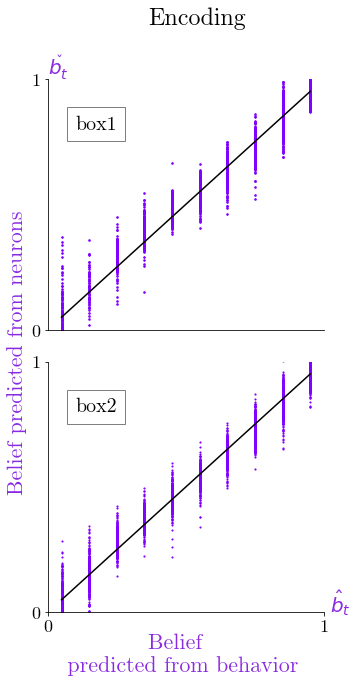

In [16]:
fig_encoding, ax = plt.subplots(2,1,figsize=(5,10))
plt.suptitle('Encoding', fontsize = 24, fontweight='bold')
fig_encoding.tight_layout(rect=[0, 0.1, 0.9, 0.9])

ax[0].scatter(bb_df_test['behavior_belief1'], nb_df_test['behavior_belief1'],
              s=10, c=[(130/255,0,1)], marker='.')
ax[0].plot(belief_array, belief_array, c='black')
ax[0].set(xlim = [0,1], ylim = [0,1],xticks=[], yticks = [0, 1])
ax[0].tick_params(labelsize=14)
#ax[0].set_title('box1', fontsize = 20.0)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].text(0, 1.02, '$b^{\check}_t$',  fontsize = 20.0, color = neural_color)
ax[0].text(.1, .8, 'box1',  fontsize = 20.0,
        bbox={'facecolor': 'none', 'alpha': 0.5, 'pad': 8})
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    #label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax[1].scatter(bb_df_test['behavior_belief2'], nb_df_test['behavior_belief2'], 
              s=5, c=[(130/255,0,1)], marker='.')
ax[1].plot(belief_array, belief_array, c='black')
ax[1].set(xlim = [0,1], ylim = [0,1],xticks=[0, 1], yticks = [0, 1])
ax[1].tick_params(labelsize=14)
#ax[1].set_title('box2', fontsize = 20.0)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].text(1.02, 0, '$\hat{b}_t$',  fontsize = 20.0, color = neural_color)
ax[1].text(.1, .8, 'box2',  fontsize = 20.0,
        bbox={'facecolor': 'none', 'alpha': 0.5, 'pad': 8})
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    #label.set_fontname('Arial')
    label.set_fontsize(18)

fig=ax[0].figure
fig.text(0.45, 0.08, 'Belief \n predicted from behavior', color=neural_color,
         va='center', ha='center', fontsize = 22)
fig.text(0, 0.5, 'Belief predicted from neurons', color=neural_color,
         va='center', ha='center', rotation='vertical', fontsize = 22)
fig_encoding.savefig('encoding.pdf', format = 'pdf', 
                     bbox_inches="tight")

### build neural belief data using the learned model

In [17]:
#neural estimate of belief using current linear regression model
nb= regr.predict(r_df)  # input is ALL data
nb_df = DataFrame(nb, columns = bb_df.columns)
#save neural estimate belief
nb_df.to_csv(path_or_buf='./data/nb_df.csv',index=False)

In [18]:
# # plot: compare raw data vs prediction
# S = 5 # dot size for scatter plot
# plt.scatter(bb_df['behavior_belief1'], nb_df['behavior_belief1'], s=S, c='blue', marker='.')
# plt.xlabel('Beliefs from behavior model (true)')
# plt.ylabel('Beliefs from neural code (estimated)')
# plt.plot(belief_array, belief_array, c='b')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.title('Encoding: Box 1 (ALL data)')
# plt.show()

# plt.scatter(bb_df['behavior_belief2'], nb_df['behavior_belief2'], s=S, c='red', marker='.')
# plt.xlabel('Beliefs from behavior model (true)')
# plt.ylabel('Beliefs from neural code (estimated)')
# plt.plot(belief_array, belief_array, c='r')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.title('Encoding: Box 2 (ALL data)')
# plt.show()


In [19]:
# fig_encoding, ax = plt.subplots(2,1,figsize=(7,15))
# plt.suptitle('Encoding', fontsize = 24)
# fig_encoding.tight_layout(rect=[0, 0.1, 0.9, 0.9])

# ax[0].scatter(bb_df['behavior_belief1'], nb_df['behavior_belief1'], s=S, c='blue', marker='.')
# ax[0].plot(belief_array, belief_array, c='b')
# ax[0].set(xlim = [0,1], ylim = [0,1],xticks=[0, 1], yticks = [0, 1])
# ax[0].tick_params(labelsize=14)
# ax[0].set_title('box1', fontsize = 20.0)
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)

# ax[1].scatter(bb_df['behavior_belief2'], nb_df['behavior_belief2'], s=S, c='red', marker='.')
# ax[1].plot(belief_array, belief_array, c='r')
# ax[1].set(xlim = [0,1], ylim = [0,1],xticks=[0, 1], yticks = [0, 1])
# ax[1].tick_params(labelsize=14)
# ax[1].set_title('box2', fontsize = 20.0)

# fig=ax[0].figure
# fig.text(0.45, 0.08, 'Beliefs from behavior model $\hat{b}_t$', va='center', ha='center', fontsize = 18)
# fig.text(0, 0.5, 'Beliefs from neural encoding $\check{b}_t$', va='center', ha='center', rotation='vertical', fontsize = 18)
# #fig_encoding.savefig('figures/encoding.pdf', format = 'pdf', bbox_inches="tight")




In [20]:
# fig_encoding, ax = plt.subplots(2,1,figsize=(5,10))
# plt.suptitle('Encoding', fontsize = 24, fontweight='bold')
# fig_encoding.tight_layout(rect=[0, 0.1, 0.9, 0.9])

# ax[0].scatter(bb_df['behavior_belief1'], nb_df['behavior_belief1'],
#               s=10, c=neural_color, marker='.')
# ax[0].plot(belief_array, belief_array, c='black')
# ax[0].set(xlim = [0,1], ylim = [0,1],xticks=[], yticks = [0, 1])
# ax[0].tick_params(labelsize=14)
# #ax[0].set_title('box1', fontsize = 20.0)
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[0].text(0, 1.02, '$b^{\check}_t$',  fontsize = 20.0, color = neural_color)
# ax[0].text(.1, .8, 'box1',  fontsize = 20.0,
#         bbox={'facecolor': 'none', 'alpha': 0.5, 'pad': 8})
# for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
#     #label.set_fontname('Arial')
#     label.set_fontsize(18)
    

# ax[1].scatter(bb_df['behavior_belief2'], nb_df['behavior_belief2'], 
#               s=5, c=neural_color, marker='.')
# ax[1].plot(belief_array, belief_array, c='black')
# ax[1].set(xlim = [0,1], ylim = [0,1],xticks=[0, 1], yticks = [0, 1])
# ax[1].tick_params(labelsize=14)
# #ax[1].set_title('box2', fontsize = 20.0)
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# ax[1].text(1.02, 0, '$\hat{b}_t$',  fontsize = 20.0, color = neural_color)
# ax[1].text(.1, .8, 'box2',  fontsize = 20.0,
#         bbox={'facecolor': 'none', 'alpha': 0.5, 'pad': 8})
# for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
#     #label.set_fontname('Arial')
#     label.set_fontsize(18)

# fig=ax[0].figure
# fig.text(0.45, 0.08, 'Belief \n predicted from behavior', color=neural_color,
#          va='center', ha='center', fontsize = 22)
# fig.text(0, 0.5, 'Belief predicted from neurons', color=neural_color,
#          va='center', ha='center', rotation='vertical', fontsize = 22)
# fig_encoding.savefig('encoding.pdf', format = 'pdf', 
#                      bbox_inches="tight")

In [21]:
# fig_encoding_jitter, ax = plt.subplots(1,2,figsize=(15,7))
# plt.suptitle('encoding of neural activity', fontsize = 24)
# fig_encoding_jitter.tight_layout(rect=[0, 0.1, 0.9, 0.9])

# ax[0].scatter(bb_df['behavior_belief1'] + 0.06 * (2 * np.random.random(bb_df['behavior_belief1'].shape)-1), nb_df['behavior_belief1'], s=S, c='blue', marker='o')
# ax[0].plot(belief_array, belief_array, c='b')
# ax[0].set(xlim = [0,1], ylim = [0,1],xticks=[0, 1], yticks = [0, 1])
# ax[0].tick_params(labelsize=14)
# ax[0].set_title('box1', fontsize = 20.0)

# ax[1].scatter(bb_df['behavior_belief2']+ 0.06 * (2 * np.random.random(bb_df['behavior_belief1'].shape)-1), nb_df['behavior_belief2'], s=S, c='red', marker='x')
# ax[1].plot(belief_array, belief_array, c='r')
# ax[1].set(xlim = [0,1], ylim = [0,1],xticks=[0, 1], yticks = [0, 1])
# ax[1].tick_params(labelsize=14)
# ax[1].set_title('box2', fontsize = 20.0)

# fig=ax[0].figure
# fig.text(0.45, 0.08, 'Beliefs from behavior model $\hat{b}_t$', va='center', ha='center', fontsize = 18)
# fig.text(0, 0.5, 'Beliefs from neural encoding $\check{b}_t$', va='center', ha='center', rotation='vertical', fontsize = 18)
# fig_encoding_jitter.savefig('figures/encoding_jitter.pdf', format = 'pdf', bbox_inches="tight")





# 